prophet是facebook开源的python预测库，该库的api设计与sklearn很像，也是分为fit方法和predict方法。

prophet库可以帮助我们进行
- Saturating Forecasts
- Trend Changepoints
- Seasonality, Holidays Effects
- Multiplicative Seasonality
- Uncertainty Intervals
- Outliers
- Non-Daily Data
- Diagnostics


传入prophet的数据分为两列 **ds** 和 **y**， 其中
- ds是pandas的日期格式，样式类似与``YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS``； 
- y列必须是数值型，代表着我们希望预测的值。

本文使用的是wiki网站日访问量（数值经过log处理）的csv数据文件。

### 安装

In [7]:
!pip3 install fbprophet

### 一、导入数据

In [31]:
import pandas as pd
from fbprophet import Prophet

df = pd.read_csv('example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


检查下df的数据类型

In [32]:
df.dtypes

ds     object
y     float64
dtype: object

ds列必须是pandas的datetime数据类型，我们使用pandas自带的pd.to_datetime将日期转为datetime类型。顺便画个图看看

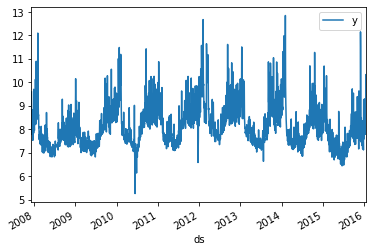

In [33]:
df['ds'] = df['ds'].apply(pd.to_datetime)
df.set_index('ds').plot()

### 二、拟合数据
学习数据中的规律

In [35]:
prophet = Prophet()
prophet.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### 三、预测
生成一个未来的日期的dataframe，然后用训练好的模型prophet来predict。

生成未来日期的dateframe用到 Prophet.make_future_dataframe(periods)

In [36]:
future = prophet.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


有了未来的日期,我们就可以使用学习到的趋势来预测未来日期的走势。

预测的结果包括如下变量

```
'ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'
```

我们只用 ``'ds', 'yhat', 'yhat_lower', 'yhat_upper'``

In [37]:
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2007-12-10,8.844170,8.212114,9.464493
1,2007-12-11,8.592697,7.959001,9.163997
2,2007-12-12,8.388514,7.732095,8.993710
3,2007-12-13,8.366423,7.722536,8.983998
4,2007-12-14,8.354384,7.726847,8.971309


Prophet.plot方法可以帮助我们可视化

Figure(720x432)


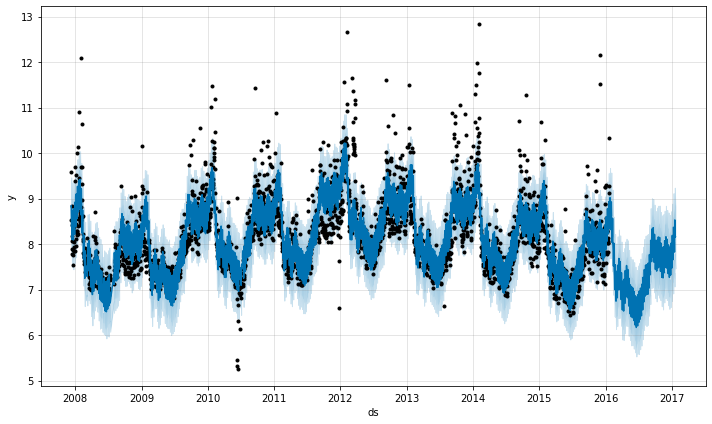

In [48]:
fig1 = prophet.plot(forecast)
print(fig1)


**成分分析**

趋势是由不同的成分组成，比如总趋势、年、季节、月、周等等，我们要将这些成分从趋势中抽取出来看看不同成分的趋势情况

Figure(648x648)


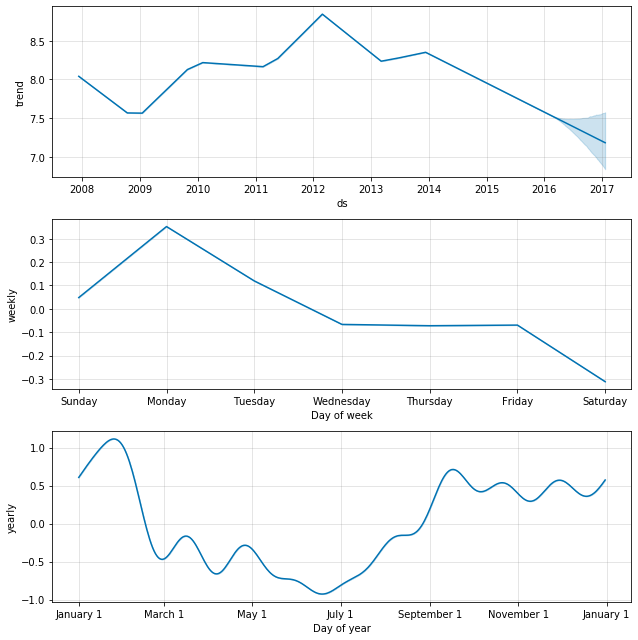

In [47]:
fig2 = prophet.plot_components(forecast)
print(fig2)